## Code submission

If you would like to use Jupyter (perhaps the easiest way, this replaces the old IJuliaNotebook), just submit the notebook file. Name it as p(Homework#).ipynb.  For instance, for homework 1, name it as p1.ipynb. I suggest everyone use the latest version of Julia (current stable version **v0.7.0**. Please **DO NOT** use v1.0.0 **unless you know what you are doing**).  

If you use MATLAB or Julia/Python (not the notebook), name your main program as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). 

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear.  

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

E-mail the codes above, and **any supporting files** for the homework to bCourses

You can **either** name it as

lastname_firstname_1.ipynb (if you **only** have a notebook file)

**or**

lastname_firstname_1.zip (if you have **more than one** files)

## Important notice

1. This homework can be finished by a single person or a group of **up to THREE people**. If this is a group, then it should involve people from **at least TWO different departments**. (You need to fill the box below)  Each team only needs to submit **ONE copy** of the report (any team member can submit and the scores will be the same for all team members).  It is your responsibility to distribute the work relatively evenly within the team. 

2. Everyone (group) needs to work on Problem 1, 2, 3 and select **one question** from Problem 4a or 4b.  (You are welcome to do both..).

3. Optional questions do not count towards the grades. It is up to you to do all, one or none of them.

4. Unless otherwise specified, you can choose whatever parameters and forms for the Coulomb interaction, pseudopotential etc that you think are "physical". One of the points of doing these exercises is to try to convince you that physical details and paramters only matter **to some extent** (they still matter!)

(**Your cool group name**)

**Last1, First1, Department1**

**Last2, First2, Department2**

..

$$
\newcommand{\bvec}[1]{{\boldsymbol #1}}
\newcommand{\norm}[1]{{\lVert#1\rVert}}
\newcommand{\bra}[1]{{\langle#1\rvert}}
\newcommand{\ket}[1]{{\lvert#1\rangle}}
\newcommand{\RR}{\mathbb{R}}
$$

## Problem 1

[Book] 3.5 



### Solution:


The time-ordered exponential is defined as 
$$
\mathcal{T}[e^{-i\int_0^t H(s)ds}]=I-i\int_0^tH(s)ds+\frac{(-i)^2}{2!}\int_0^t\int_0^t\mathcal{T}[H(s_1)H(s_2)]ds_1ds_2+\cdots,
$$
where
$$
\mathcal{T}[A(s_1)A(s_2)]=\left\{\begin{array}{rcl}A(s_1)A(s_2), & s_1\geq s_2;\\A(s_2)A(s_1), & s_1< s_2.\end{array}\right.
$$

Therefore, we have
$$
\int_0^t\cdots\int_0^t\mathcal{T}[H(s_1),\cdots,H(s_n)]ds_1\cdots ds_n = n!\int_0^t\int_0^{s_n}\int_0^{s_{n-1}}\cdots\int_0^{s_2}H(s_n)\cdots H(s_1)ds_1\cdots ds_n.
$$

Using this, we can obtain
$$
\begin{aligned}
\frac{\partial}{\partial t}\mathcal{U}(t,0)&=\frac{\partial}{\partial t}\mathcal{T}[e^{-i\int_0^t H(s)ds}],\\
&=-iH(t)+(-i)^2H(t)\int_0^tH(s_1)ds_1+(-i)^3H(t)\int_0^t\int_0^{s_2}H(s_1)H(s_1)ds_1ds_2+\cdots,\\
&=-iH(t)\mathcal{U}(t,0).
\end{aligned}
$$

Then
$$
\begin{aligned}
\frac{\partial}{\partial t}P(t)&=\frac{\partial}{\partial t}(\mathcal{U}(t,0)P(0)\mathcal{U}(0,t)),\\
&=(-iH(t)\mathcal{U}(t,0))P(0)\mathcal{U}(0,t)+\mathcal{U}(t,0)P(0)(i\mathcal{U}(0,t)H(t)),\\
&=-iH(t)P(t)+iP(t)H(t),\\
&=-i[H(t),P(t)].
\end{aligned}
$$

Hence the solution to $\frac{\partial}{\partial t}P(t)=-i[H(t),P(t)]$ can be written as
$$
P(t)=\mathcal{T}[e^{-i\int_0^t H(s)ds}]P(0)(\mathcal{T}[e^{-i\int_0^t H(s)ds}])^*=\mathcal{U}(t,0)P(0)\mathcal{U}(0,t). 
$$

## Problem 2

Use the one dimensional model for the H$_2$ molecule, evaluate the spin-restricted MP2 energy with respect to the bond length.

Reference:

http://sirius.chem.vt.edu/wiki/doku.php?id=crawdad:programming:project4

http://sirius.chem.vt.edu/~crawdad/programming/mp2.pdf



In [1]:
using LinearAlgebra

struct Ham
    R
    rhoa_atom
    rhoa
    Vext
    V_II
    Vext_total
    H_total
end

function init(IntDist,verbose)
    # Nuclei
    println("Distance: ", IntDist)
    R = [-IntDist/2.00,IntDist/2.00]
    rhoa_atom = zeros(Ns,Natoms)
    rhoa = zeros(Ns)
    for j = 1 : Natoms
        dist = gridpos .- R[j]
        @. rhoa_atom[:,j] = - Z[j] / sqrt(2*pi*sigma[j]^2) * (exp(-0.5*(dist/sigma[j])^2 ))
        rhoa .= rhoa + rhoa_atom[:,j]
    end
    # Potential from Nuclei
    Vext = vC_mat * rhoa * dx
    # Nuclear-Nuclear Repulsion

    V_II = vC(IntDist)
    
    if verbose >= 2
        figure(IntDist/dx)
        plot(gridpos,[rhoa_atom vC_mat*rhoa_atom[:,1] vC_mat*rhoa_atom[:,2]])
    end
    
    # Total Hamiltonian
    Vext_total = vC_mat * rhoa[:] * dx
    H_total = Lap + diagm(0=>Vext_total)
    return Ham(R, rhoa_atom, rhoa, Vext, V_II, Vext_total, H_total)
end

function exact(ham::Ham, verbose)
    # Construct the 2-body Hamiltonian (by brute force)
    Iden = Matrix(1.0I,Ns,Ns)
    H_total = ham.H_total
    V_II = ham.V_II
    
    H = kron(H_total,Iden) + kron(Iden,H_total) + diagm(0=>vC_mat[:])
    
    eigH = eigen(H)
    
    # spin treatment
    Psi_nd = reshape(eigH.vectors[:,1],Ns,Ns)
    spin = norm(Psi_nd-Psi_nd')

    # Ground and first excited states
    energies = eigH.values[1:2] .+ V_II
    if verbose >= 1
        println(" Exact energy:", energies, ", <S^2> = ", spin)
    end
    return energies, spin
end


function rhf(ham::Ham, Nb,tol,maxiter,alpha,verbose)
    rhoa_atom = ham.rhoa_atom
    Vext_total = ham.Vext_total
    H_total = ham.H_total
    V_II = ham.V_II


    H_hf = Lap + diagm(0=>(Vext_total))
    # Prepare for SCF
    err = 1.0 ; iter = 0 ; E_hf = 0.0
    # the following is for H2 only.
    while( err > tol && iter < maxiter)
        H_hf = (H_hf+H_hf')/2.0
        eigH_hf = eigen(H_hf)
        
        # normalize the wavefunctions according to physical scaling
        psi_hf = eigH_hf.vectors[:,1] / sqrt(dx)

        P = 2.0* psi_hf * psi_hf'
        rho = diag(P)
        Vhar = vC_mat * rho * dx
        Hfock = - vC_mat .* P * dx
        
        H_hf_new = Lap + diagm(0=>(Vext_total+0.5*Vhar))
        
        E_hf = 2*(eigH_hf.values[1]) - 0.25 * sum(Vhar .* rho * dx) + V_II
        
        err = norm(H_hf - H_hf_new) / norm(H_hf)
        iter = iter + 1
        if verbose >= 3
            println("   Iter = ", iter, ", err = ", err)
        end
        
        H_hf = (1-alpha) * H_hf + alpha * H_hf_new
    end

    if verbose >= 1
        println(" RHF energy:", E_hf)
    end
    if verbose >= 2
        println("  Iter = ", iter, ", err = ", err)
    end

    # After convergence, diagonalize the problem again to get the eigenvectors
    H_hf = (H_hf+H_hf')/2.0
    eigH_hf = eigen(H_hf)
    
    psi_hf = eigH_hf.vectors[:,1:Nb] / sqrt(dx)
    ev_hf = eigH_hf.values[1:Nb]
    
    return E_hf, psi_hf, ev_hf
end



# MP2 part

function rmp2(ham::Ham,Nb,E_hf,psi_hf,ev_hf,verbose)
    # the following is only for H2
    nocc = 1
    nvirt = Nb-nocc    
   
    i = 1
    j = 1

    E_mp2 = 0.0
    for a in nocc+1:Nb
        for b in nocc+1:Nb
            Vijab = (psi_hf[:,i].*psi_hf[:,a])' * (vC_mat * (psi_hf[:,j].*psi_hf[:,b])) * (dx^2)
            E_mp2 += (Vijab^2.0)/(ev_hf[i]+ev_hf[j]-ev_hf[a]-ev_hf[b])
        end
    end
    
    E_mp2 = E_mp2 + E_hf

    if verbose >= 1
        println(" MP2 energy:", E_mp2)
    end

    return E_mp2
end

rmp2 (generic function with 1 method)

Distance: 0.4
 Exact energy:[-2.88629, -2.09469], <S^2> = 9.923640094301264e-16
 RHF energy:-2.7764159241853195
 MP2 energy:-2.8944161468738754
Distance: 0.6
 Exact energy:[-3.26955, -2.5483], <S^2> = 1.814255690488089e-15
 RHF energy:-3.1519329128373395
 MP2 energy:-3.2812477987699484
Distance: 0.8
 Exact energy:[-3.43175, -2.79859], <S^2> = 2.4160369946042197e-15
 RHF energy:-3.3028638467519817
 MP2 energy:-3.4490617188752366
Distance: 1.0
 Exact energy:[-3.4685, -2.93289], <S^2> = 1.3540105981070166e-15
 RHF energy:-3.3244504559094263
 MP2 energy:-3.494102476130252
Distance: 1.2
 Exact energy:[-3.43812, -3.0015], <S^2> = 1.1646107966807094e-15
 RHF energy:-3.274704889004923
 MP2 energy:-3.47561992666826
Distance: 1.4
 Exact energy:[-3.37602, -3.03302], <S^2> = 2.0402614594303256e-15
 RHF energy:-3.1888281805149266
 MP2 energy:-3.430286470404777
Distance: 1.6
 Exact energy:[-3.30393, -3.04423], <S^2> = 1.018429029055382e-15
 RHF energy:-3.088517398465885
 MP2 energy:-3.38156127778529

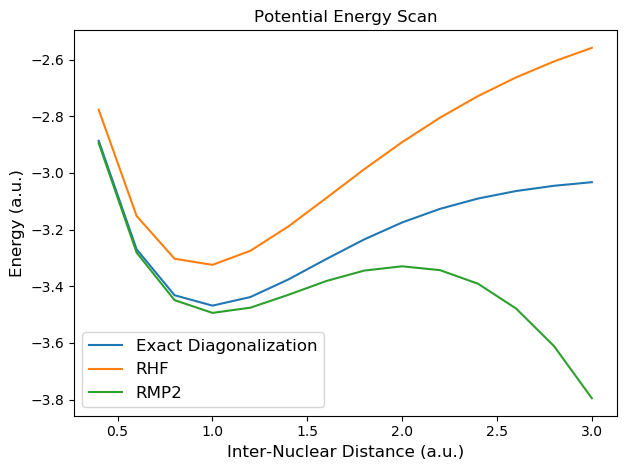

-2.5580652467745177
 MP2 energy:-3.795401198508184


PyObject Text(0.5,1,'Potential Energy Scan')

In [2]:
using PyPlot

# Nuclei
Natoms = 2
Z = [1.0,1.0]
sigma = [0.50,0.50]

# Potential Form
ϵ_0 = 1.0
κ = 0.3

vC(x) = 1.0 / (ϵ_0 * sqrt(x^2 + κ^2))

# Grid Specs
Ls = 10.0 
dx = 0.4
gridpos = collect(range(-Ls,stop=Ls,step=dx))
Ns = length(gridpos)

# V operator for this grid
vC_mat = [vC(gridpos[i]-gridpos[j]) for i in 1:Ns, j in 1:Ns]

# Laplacian Operator
Lap = 1.0 / (2.0*dx^2) * diagm(-1=>-ones(Ns-1),0=>2.0*ones(Ns),1=>-ones(Ns-1))

# Scan Settings in units of bohr
IntDist_beg = 0.4
IntDist_end = 3.0
IntDist_step = 0.2


IntDists = collect(range(IntDist_beg,stop=IntDist_end,step=IntDist_step))
Rs = length(IntDists)

# Energy Containers:
energies_exact = zeros(Rs,2)
spins_exact = zeros(Rs)

energies_rhf = zeros(Rs)
energies_rmp2 = zeros(Rs)


# Running Settings
verbose = 1
Nb = 20

tol = 1e-6
alpha = 0.05
maxiter = 5000

# PES START
for i in range(1,length=length(IntDists))
    ham = init(IntDists[i],verbose)
    energies_exact[i,:], _ = exact(ham,verbose)
    E_hf, psi_hf, ev_hf = rhf(ham, Nb,tol,maxiter,alpha,verbose)
    energies_rhf[i] = E_hf
    
    energies_rmp2[i] = rmp2(ham, Nb, E_hf, psi_hf, ev_hf, verbose)
    
end ## PES END

figure(1)
plot(IntDists,[energies_exact[:,1] energies_rhf energies_rmp2])
legend(("Exact Diagonalization","RHF","RMP2"))
xlabel("Inter-Nuclear Distance (a.u.)")
ylabel("Energy (a.u.)")
title("Potential Energy Scan")
#ylim(-3.6,-2.8)


## Problem 3

Use the one dimensional model for the H$_2$ molecule, evaluate the spin-restricted excitation spectrum (i.e. the excited state eigenvalues $\omega$) by solving the Casida equation. 

Reference: 

[Book] 3.8


In [4]:
function casida(ham::Ham,Nb,E_hf,psi_hf,ev_hf,verbose)
    # the following is only for H2
    nocc = 1
    nvirt = Nb-nocc    
    
    i = 1
    j = 1
    
    psi_hf_occ = psi_hf[:,1]
    psi_hf_vir = psi_hf[:,2:Nb]
    ev_hf_occ = ev_hf[1]
    ev_hf_vir = ev_hf[2:Nb]
    Psi_ia = zeros(Ns,Nb-1)
    Psi_ai = zeros(Ns,Nb-1)
    D_ai = zeros(Nb-1)
    for a in 1:Nb-1
        # the distinction is only formal here
        Psi_ia[:,a] = psi_hf_occ[:,1] .* psi_hf_vir[:,a] 
        Psi_ai[:,a] = psi_hf_vir[:,a] .* psi_hf_occ[:,1] 
        D_ai[a] = ev_hf_vir[a]-ev_hf_occ[1]
    end
    D_mat = diagm(0=>D_ai)
    A_mat = zeros(Nb-1,Nb-1)
    B_mat = zeros(Nb-1,Nb-1)
    for a in 1:Nb-1
        for b in 1:Nb-1
            A_mat[a,b] = Psi_ai[:,a]'*(vC_mat*Psi_ai[:,b]) * dx^2
            B_mat[a,b] = Psi_ai[:,a]'*(vC_mat*Psi_ia[:,b]) * dx^2
        end
    end
    Omega_mat = [D_mat+A_mat B_mat;B_mat D_mat+A_mat]
    C_mat = [Matrix(1.0I,Nb-1,Nb-1) zeros(Nb-1,Nb-1);zeros(Nb-1,Nb-1) Matrix(-1.0I,Nb-1,Nb-1)]
    omega = eigen(Omega_mat,C_mat).values

    return omega
end


function gauss_smear(grid,omega,sigma)
    omega_inta = zeros(length(grid),length(omega)) # collect gaussian for each excitation
    omega_int = zeros(length(grid)) # summation of all gaussian
    for j = 1 : length(omega)
        omega_loc = grid .- omega[j]
        @. omega_inta[:,j] = 1 / sqrt(2*pi*sigma^2) * 
            (exp(-0.5*(omega_loc/sigma)^2 ))
        omega_int .= omega_int + omega_inta[:,j]
    end
    return omega_int
end


gauss_smear (generic function with 1 method)

Distance: 1.0


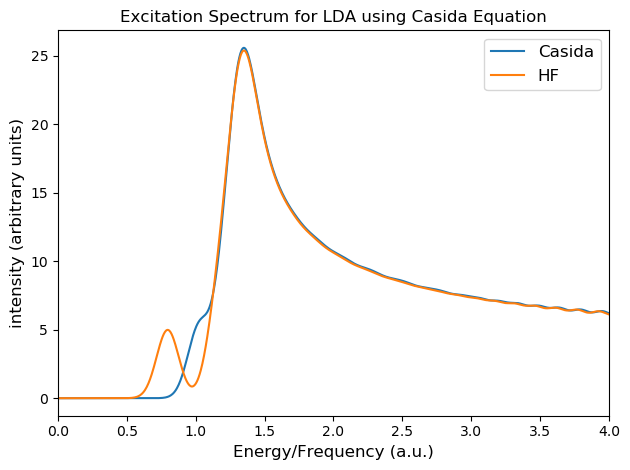

 RHF energy:-3.3244626870036322


PyObject <matplotlib.legend.Legend object at 0x7f5334bc9e10>

In [10]:
# This uses the result from Problem 2


# Nuclei
Natoms = 2
Z = [1.0,1.0]
sigma = [0.50,0.50]

# Potential Form
ϵ_0 = 1.0
κ = 0.3

vC(x) = 1.0 / (ϵ_0 * sqrt(x^2 + κ^2))

# Grid Specs
Ls = 20.0 # increased box size
dx = 0.4
gridpos = collect(range(-Ls,stop=Ls,step=dx))
Ns = length(gridpos)

# V operator for this grid
vC_mat = [vC(gridpos[i]-gridpos[j]) for i in 1:Ns, j in 1:Ns]

# Laplacian Operator
Lap = 1.0 / (2.0*dx^2) * diagm(-1=>-ones(Ns-1),0=>2.0*ones(Ns),1=>-ones(Ns-1))

verbose = 1
Nb = 40

tol = 1e-6
alpha = 0.05
maxiter = 5000

# Equilibrium position
IntDist = 1.0
ham = init(IntDist,verbose)
E_hf, psi_hf, ev_hf = rhf(ham, Nb,tol,maxiter,alpha,verbose)
omega = casida(ham, Nb, E_hf, psi_hf, ev_hf, verbose)

omega_casida = sort(omega[findall(omega .> 0)])
omega_hf = sort(ev_hf[2:Nb] .- ev_hf[1])

# Plot each excitation as a gaussian
freq_grid = collect(range(0,stop=10,step=dx/100))
smear_sigma = 0.08
omega_casida_smear = gauss_smear(freq_grid, omega_casida, smear_sigma)
omega_hf_smear = gauss_smear(freq_grid, omega_hf, smear_sigma)

figure(1)
plot(freq_grid, omega_casida_smear, label="Casida")
plot(freq_grid, omega_hf_smear, label="HF")
xlabel("Energy/Frequency (a.u.)")
ylabel("intensity (arbitrary units)")
title("Excitation Spectrum for LDA using Casida Equation")
xlim(0,4) # since above 4 a.u. will most likely kick out the electron rather than excite it
legend()


## Problem 4a

Use the one dimensional model for the H$_2$ molecule, evaluate the spin-restricted coupled cluster energy with doubles (CCD) with respect to the bond length.

Reference:

http://sirius.chem.vt.edu/wiki/doku.php?id=crawdad:programming:project5

http://sirius.chem.vt.edu/wiki/lib/exe/fetch.php?media=crawdad:programming:jcp_94_4334_1991.pdf

Note: 

1. The paper in the reference above uses the formula for CCSD. In order to get the CCD equation, you can set the singles amplitutde (i.e. $t_{i}^{a}$) to zero. Another way to obtain the CCD equation is to use the note provided in the lecture (which uses spin-orbital instead of spatial orbital).

2. Using Einstein summation is the simplest way to implement the tensor contraction. However, Julia's Einstein summation module is out-of-date. So python is perhaps a better choice for this problem.

3. In order to solve the second order equation with respect to the amplitudes (called the Riccati equation), the simplest way is perhaps simple mixing or DIIS. 

**The following code is adapted from the solution of Jiahao Yao**

In [10]:
# Use setup in Problem 2 


function mo_coeff(psi_hf)
    # two-electron repulsion integrals
    coeff = zeros(Float64, Nb, Nb, Nb, Nb)

    for i = 1:Nb
        for j = 1:Nb
            for k = 1:Nb
                for l = 1:Nb
                    #  remove the dx * dx
                    coeff[i, j, k, l] = (psi_hf[:, i] .*psi_hf[:, j])' * vC_mat * (psi_hf[:, k] .*psi_hf[:, l] ) * dx^2
                end
            end
        end
    end
    return coeff
end


# Spin-orbital integrals
function mos_coeff(mo_c)
    # spatial-spin coeff
    spin_dim = 2
    coeff = zeros(Float64, Nb, Nb, Nb, Nb, spin_dim, spin_dim, spin_dim, spin_dim)

    # coeff
    for i = 1:Nb
        for j = 1:Nb
            for k = 1:Nb
                for l = 1:Nb
                    for p = 1:spin_dim
                        for q = 1:spin_dim
                            # order here is very important 
                            coeff[i, j, k, l, p, q, p, q] = mo_c[i, k, j, l]
                        end
                    end
                end
            end
        end
    end

    return coeff
end

# Spin-orbital integrals (with the exchange part)
function moss_coeff(mos_c)
    # spatial-spin coeff
    spin_dim = 2
    coeff = zeros(Float64, Nb, Nb, Nb, Nb, spin_dim, spin_dim, spin_dim, spin_dim)

    # coeff
    for i = 1:Nb
        for j = 1:Nb
            for k = 1:Nb
                for l = 1:Nb
                    for i_s = 1:spin_dim
                        for j_s = 1:spin_dim
                            for k_s = 1:spin_dim
                                for l_s = 1:spin_dim
                                    coeff[i, j, k, l, i_s, j_s, k_s, l_s] = mos_c[i, j, k, l, i_s, j_s, k_s, l_s] - mos_c[i, j, l, k, i_s, j_s, l_s, k_s]
                                end
                            end
                        end
                    end
                end
            end
        end
    end

    return coeff
end


# H_pq is the spin-orbital based Fock matrix.
function hss_pq(H_pq, moss_c, occ, vir)
    # spatial-spin coeff
    spin_dim = 2
    coeff = zeros(Float64, Nb, Nb, spin_dim, spin_dim)

    # coeff
    for i = 1:Nb
        for j = 1:Nb
            for p = 1:spin_dim
                for q = 1:spin_dim
                    bonus = 0.0
                    for m in occ
                        for m_s = 1:spin_dim
                            # bonus += mos_c[i, m, j, m, p, m_s, q, m_s] - mos_c[i, m, m, j, p, m_s, m_s, q]
                            bonus += moss_c[i, m, j, m, p, m_s, q, m_s] 
                        end
                    end
                    #  Take into consideration of the spin
                    if p == q
                        coeff[i, j, p, q] = H_pq[i, j] + bonus
                    else
                        coeff[i, j, p, q] = bonus
                    end
                end
            end
        end
    end

    return coeff
end




# reference: http://www.esqc.org/static/lectures/gauss_CC_lecture_handout.pdf
# Page 129/199
function ccd_func(hs_pq, moss_c, t, occ, vir)
    # t first vir -> then occ
    t_size = size(t)
    F = zeros(t_size)
    spin_dim = 2
    N_occ = length(occ)
    N_vir = length(vir)

    # build F_mi
    F_mi = zeros(N_occ, N_occ, spin_dim, spin_dim)


    for m in occ
        for i in occ 
            for m_s = 1:spin_dim
                for i_s = 1:spin_dim
                    bonus = 0
                    for n in occ 
                        for e in vir 
                            for f in vir 
                                for n_s = 1:spin_dim
                                    for e_s = 1:spin_dim
                                        for f_s = 1:spin_dim
                                            e_new = e - vir[1] + 1
                                            f_new = f - vir[1] + 1
                                            bonus += moss_c[m, n, e, f, m_s, n_s, e_s, f_s] * t[e_new, f_new, i, n, e_s, f_s, i_s, n_s]
                                        end
                                    end
                                end
                            end
                        end
                    end

                    F_mi[m, i, m_s, i_s] = hs_pq[m, i, m_s, i_s] + 0.5 * bonus
                end
            end
        end
    end



    F_ae = zeros(N_vir, N_vir, spin_dim, spin_dim)


    for a in vir
        for e in vir
            for a_s = 1:spin_dim
                for e_s = 1:spin_dim
                    bonus = 0 
                    a_new = a - vir[1] + 1
                    e_new = e - vir[1] + 1
                    for m in occ
                        for n in occ
                            for f in vir
                                for m_s = 1:spin_dim
                                    for n_s = 1:spin_dim
                                        for f_s = 1:spin_dim
                                            f_new = f - vir[1] + 1
                                            bonus +=  moss_c[m, n, e, f, m_s, n_s, e_s, f_s] * t[a_new, f_new, m, n, a_s, f_s, m_s, n_s]
                                        end
                                    end
                                end
                            end
                        end
                    end
                    F_ae[a_new, e_new, a_s, e_s] = hs_pq[a, e, a_s, e_s] - 0.5 * bonus
                end
            end
        end
    end



    w_mnij = zeros(N_occ, N_occ, N_occ, N_occ, spin_dim, spin_dim, spin_dim, spin_dim)
    for m in occ
        for n in occ
            for i in occ
                for j in occ
                    for m_s = 1:spin_dim
                        for n_s = 1:spin_dim
                            for i_s = 1:spin_dim
                                for j_s = 1:spin_dim
                                    bonus = 0
                                    for e in vir
                                        for f in vir
                                            for e_s = 1:spin_dim
                                                for f_s = 1:spin_dim
                                                    e_new = e - vir[1] + 1
                                                    f_new = f - vir[1] + 1
                                                    bonus += moss_c[m, n, e, f, m_s, n_s, e_s, f_s] * t[e_new, f_new, i, j, e_s, f_s, i_s, j_s]
                                                end
                                            end
                                        end
                                    end
                                    w_mnij[m, n, i, j, m_s, n_s, i_s, j_s] = moss_c[m, n, i, j, m_s, n_s, i_s, j_s] + 0.5 * bonus
                                end
                            end
                        end
                    end
                end
            end
        end
    end


    w_mbej = zeros(N_occ, N_vir, N_vir, N_occ, spin_dim, spin_dim, spin_dim, spin_dim)
    for m in occ
        for b in vir
            for e in vir 
                for j in occ
                    for m_s = 1:spin_dim
                        for b_s = 1:spin_dim
                            for e_s = 1:spin_dim
                                for j_s = 1:spin_dim
                                    bonus = 0 
                                    b_new = b - vir[1] + 1
                                    e_new = e - vir[1] + 1
                                    for n in occ
                                        for f in vir
                                            for n_s = 1:spin_dim
                                                for f_s = 1:spin_dim
                                                    f_new = f - vir[1] + 1
                                                    bonus += moss_c[m, n, e, f, m_s, n_s, e_s, f_s] * t[b_new, f_new, j, n, b_s, f_s, j_s, n_s]
                                                end
                                            end
                                        end
                                    end
                                    w_mbej[m, b_new, e_new, j, m_s, b_s, e_s, j_s] = moss_c[m, b, e, j, m_s, b_s, e_s, j_s] + 0.5 * bonus
                                end
                            end
                        end
                    end
                end
            end
        end
    end





    for a in vir
        for b in vir
            for i in occ
                for j in occ
                    for a_s = 1:spin_dim
                        for b_s = 1:spin_dim 
                            for i_s = 1:spin_dim
                                for j_s = 1:spin_dim
                                    a_new = a - vir[1] + 1
                                    b_new = b - vir[1] + 1

                                    bonus1 = 0
                                    for e in vir
                                        e_new = e - vir[1] + 1
                                        for e_s = 1:spin_dim

                                            bonus1 += F_ae[a_new, e_new, a_s, e_s] * t[e_new, b_new, i, j, e_s, b_s, i_s, j_s] - F_ae[b_new, e_new, b_s, e_s] * t[e_new, a_new, i, j, e_s, a_s, i_s, j_s]
                                        end
                                    end

                                    bonus2 = 0

                                    for m in occ
                                        for m_s = 1:spin_dim
                                            bonus2 += F_mi[m, i, m_s, i_s] * t[a_new, b_new, m, j, a_s, b_s, m_s, j_s] - F_mi[m, j, m_s, j_s] * t[a_new, b_new, m, i, a_s, b_s, m_s, i_s]
                                        end
                                    end

                                    bonus3 = 0
                                    for m in occ 
                                        for n in occ
                                            for m_s = 1:spin_dim
                                                for n_s = 1:spin_dim
                                                    bonus3 += w_mnij[m, n, i, j, m_s, n_s, i_s, j_s] * t[a_new, b_new, m, n, a_s, b_s, m_s, n_s]
                                                end
                                            end
                                        end
                                    end

                                    bonus4 = 0
                                    for e in vir
                                        e_new = e - vir[1] + 1
                                        for f in vir
                                            f_new = f - vir[1] + 1
                                            for e_s = 1:spin_dim
                                                for f_s = 1:spin_dim
                                                    bonus4 += moss_c[a, b, e, f, a_s, b_s, e_s, f_s] * t[e_new, f_new, i, j, e_s, f_s, i_s, j_s]
                                                end
                                            end
                                        end
                                    end

                                    bonus5 = 0
                                    for m in occ
                                        for e in vir
                                            e_new = e - vir[1] + 1
                                            for m_s = 1:spin_dim
                                                for e_s = 1:spin_dim
                                                    bonus5 += w_mbej[m, b_new, e_new, j, m_s, b_s, e_s, j_s] * t[a_new, e_new, i, m, a_s, e_s, i_s, m_s]
                                                    bonus5 -= w_mbej[m, a_new, e_new, j, m_s, a_s, e_s, j_s] * t[b_new, e_new, i, m, b_s, e_s, i_s, m_s]
                                                    bonus5 -= w_mbej[m, b_new, e_new, i, m_s, b_s, e_s, i_s] * t[a_new, e_new, j, m, a_s, e_s, j_s, m_s]
                                                    bonus5 += w_mbej[m, a_new, e_new, i, m_s, a_s, e_s, i_s] * t[b_new, e_new, j, m, b_s, e_s, j_s, m_s]
                                                end
                                            end
                                        end
                                    end

                                    # evaluate the F[a,b,i,j,a_s, b_s, i_s, j_s]
                                    F[a_new,b_new,i,j, a_s,b_s,i_s,j_s] = moss_c[a, b, i, j, a_s, b_s, i_s, j_s] + bonus1 - bonus2 + 0.5 * bonus3 + 0.5* bonus4 + bonus5
                                end
                            end
                        end
                    end
                end
            end
        end
    end
    return F
end



function init_t(moss_c, eigvals, occ, vir)
    #  use the mp2 energy to intialize the t amplitude
    N_occ = length(occ)
    N_vir = length(vir)
    spin_dim = 2
    t = zeros(N_vir, N_vir, N_occ, N_occ, spin_dim, spin_dim, spin_dim, spin_dim)
    for i in occ
        for j in occ
            for a in vir
                for b in vir
                    for i_s = 1:spin_dim
                        for j_s = 1:spin_dim
                            for a_s = 1:spin_dim
                                for b_s = 1:spin_dim
                                    a_new = a - vir[1] + 1
                                    b_new = b - vir[1] + 1
                                    t[a_new, b_new, i, j, a_s, b_s, i_s, j_s] = moss_c[i, j, a, b, i_s, j_s, a_s, b_s] / (eigvals[i] + eigvals[j] - eigvals[a] - eigvals[b])
                                end
                            end
                        end
                    end
                end
            end
        end
    end
    return t 
end



function aasolver(hs_pq, moss_c, eigvals, occ, vir)
    #  https://github.com/lin-lin/2018Fall_228A/blob/master/notebooks/NonlinearEquations.ipynb
    #  andersion acceleration: change flatten t and F to one dim
    t0 = init_t(moss_c, eigvals, occ, vir)
    t_size = size(t0)
    x = reshape(t0, :)
    N = length(x)
    maxiter = 100
    tolnrmF = 1e-8
    nrmF = zeros(maxiter)
    numhist = 10

    alpha = 0.1
    B0 = alpha*Matrix(1.0I,N,N)
    B  = B0


    xprv = x
    tprv = reshape(xprv, t_size)
    FFprv= ccd_func(hs_pq, moss_c, tprv, occ, vir)
    
    F_size = size(FFprv)
    Fprv = reshape(FFprv, :)
    
    xcur = xprv - B*Fprv
    S = zeros(N,maxiter)
    Y = zeros(N,maxiter)
    iter_stop=maxiter

    for iter = 1 : maxiter
        tcur = reshape(xcur, t_size)
        FFcur= ccd_func(hs_pq, moss_c, tcur, occ, vir)
        Fcur = reshape(FFcur, :)
        nrmF[iter] = norm(Fcur)
        #println("DIIS Iter: ", iter, ", l2 norm of residue: ", nrmF[iter])
        if( norm(Fcur) < tolnrmF )
            iter_stop=iter
            break
        end
        S[:,iter] = xcur - xprv
        Y[:,iter] = Fcur - Fprv
        indhist = max(iter-numhist+1,1):iter
        gv = pinv(Y[:,indhist],1e-10)*Fcur
        xprv = xcur
        Fprv = Fcur
        xcur = xcur - S[:,indhist]*gv - B0*(Fcur-Y[:,indhist]*gv)
    end
    x = xcur

    println("DIIS Iter: ", iter_stop, ", l2 norm of residue: ", nrmF[iter_stop])
    
    return reshape(x, t_size)
end


function ccd_energy(moss_c, t, occ, vir, E_hf)
    #  calculate the energy
    E_ccd = 0.0
    spin_dim = 2
    for i in occ
        for j in occ
            for a in vir
                a_new = a - vir[1] + 1
                for b in vir
                    b_new = b - vir[1] + 1
                    for i_s = 1:spin_dim
                        for j_s = 1:spin_dim
                            for a_s = 1:spin_dim
                                for b_s = 1:spin_dim
                                    E_ccd += 0.25 * moss_c[i, j, a, b, i_s, j_s, a_s, b_s] * t[a_new, b_new, i, j, a_s, b_s, i_s, j_s]
                                end
                            end
                        end
                    end
                end
            end
        end
    end

    E_ccd = E_ccd + E_hf
    
    println(" CCD energy:", E_ccd)

    return E_ccd
end



ccd_energy (generic function with 2 methods)

Distance: 0.2
 Exact energy:[-2.19419, -1.35711], <S^2> = 1.0911897293431044e-15
 RHF energy:-2.088825399911627
DIIS Iter: 17, l2 norm of residue: 9.738630167640843e-9
 CCD energy:-2.181176261762619
Distance: 0.4
 Exact energy:[-2.88629, -2.09469], <S^2> = 9.923640094301264e-16
 RHF energy:-2.7764159241853195
DIIS Iter: 18, l2 norm of residue: 5.7626363250423876e-9
 CCD energy:-2.8735331607805317
Distance: 0.6
 Exact energy:[-3.26955, -2.5483], <S^2> = 1.814255690488089e-15
 RHF energy:-3.1519329128373395
DIIS Iter: 18, l2 norm of residue: 7.849173869120448e-9
 CCD energy:-3.2572302190774387
Distance: 0.8
 Exact energy:[-3.43175, -2.79859], <S^2> = 2.4160369946042197e-15
 RHF energy:-3.3028638467519817
DIIS Iter: 18, l2 norm of residue: 9.021851563918976e-9
 CCD energy:-3.4200570480815244
Distance: 1.0
 Exact energy:[-3.4685, -2.93289], <S^2> = 1.3540105981070166e-15
 RHF energy:-3.3244504559094263
DIIS Iter: 20, l2 norm of residue: 6.945706128617331e-9
 CCD energy:-3.457569377536526
D

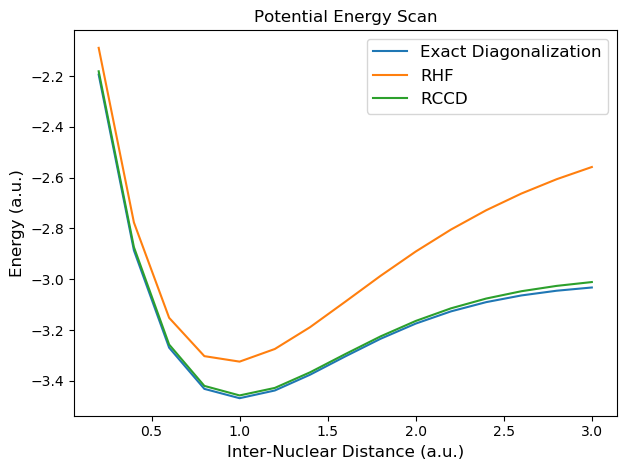

27, l2 norm of residue: 7.387730328284933e-9
 CCD energy:-3.011099038968017


PyObject Text(0.5,1,'Potential Energy Scan')

In [21]:
using PyPlot

# Nuclei
Natoms = 2
Z = [1.0,1.0]
sigma = [0.50,0.50]

# Potential Form
ϵ_0 = 1.0
κ = 0.3

vC(x) = 1.0 / (ϵ_0 * sqrt(x^2 + κ^2))

# Grid Specs
Ls = 10.0 
dx = 0.4
gridpos = collect(range(-Ls,stop=Ls,step=dx))
Ns = length(gridpos)

# V operator for this grid
vC_mat = [vC(gridpos[i]-gridpos[j]) for i in 1:Ns, j in 1:Ns]

# Laplacian Operator
Lap = 1.0 / (2.0*dx^2) * diagm(-1=>-ones(Ns-1),0=>2.0*ones(Ns),1=>-ones(Ns-1))

# Scan Settings in units of bohr
IntDist_beg = 0.2
IntDist_end = 3.0
IntDist_step = 0.2


IntDists = collect(range(IntDist_beg,stop=IntDist_end,step=IntDist_step))
Rs = length(IntDists)

# Energy Containers:
energies_exact = zeros(Rs,2)
spins_exact = zeros(Rs)

energies_rhf = zeros(Rs)
energies_rccd = zeros(Rs)


# Running Settings
verbose = 1
Nb = 20

tol = 1e-6
alpha = 0.05
maxiter = 5000

# PES START
for i in range(1,length=length(IntDists))
    ham = init(IntDists[i],verbose)
    energies_exact[i,:], _ = exact(ham,verbose)
    E_hf, psi_hf, ev_hf = rhf(ham, Nb,tol,maxiter,alpha,verbose)
    energies_rhf[i] = E_hf


    occ = [1]
    vir = collect(2:Nb)
    
    mo_c = mo_coeff(psi_hf)
    mos_c = mos_coeff(mo_c)
    moss_c = moss_coeff(mos_c)
    h_pq = psi_hf' * (Lap + diagm(0=>(ham.Vext_total))) * psi_hf * dx

    hs_pq = hss_pq(h_pq, moss_c, occ, vir)

    #  DIIS: solving the CCD equation
    t_ccd = aasolver(hs_pq, moss_c, ev_hf, occ, vir)
    energies_rccd[i] = ccd_energy(moss_c, t_ccd, occ, vir, E_hf)
    
end ## PES END

figure(1)
plot(IntDists,[energies_exact[:,1] energies_rhf energies_rccd])
legend(("Exact Diagonalization","RHF","RCCD"))
xlabel("Inter-Nuclear Distance (a.u.)")
ylabel("Energy (a.u.)")
title("Potential Energy Scan")
#ylim(-3.6,-2.8)


## Problem 4b

Modify the finite system DMRG code provided in the lecture to solve a one-dimensional Hubbard model with $10$ sites.  

$$H=-t\sum_{i=1}^{L-1} \sum_{\sigma} \left(c_{i,\sigma}^{\dagger} c_{i+1,\sigma} + h.c. \right) + \sum_{i=1}^L U n_{i,\uparrow} n_{i,\downarrow} - \mu (n_{i,\uparrow}+n_{i,\downarrow}).$$

You can use the parameters $(t=-1, U=0.5, \mu=0)$. The reference ground state energy is $-10.8564601187$.


Note: 

1) You can validate the correctness of your code by setting $U=0$, and the energy should agree with that obtained from diagonalizing the quadratic part. 

2) Due to the length of the code, you may want to write a separate Julia / python code instead of using the notebook directly.

3) Some useful convention:

- Each site has dimension 4, with the convention following the Kronecker product: spin up $\otimes$ spin down, i.e. the spin down occupies the inner dimension (row-major)

- For creation operators $c_{i,\sigma}^\dagger$, larger $i$ occupies the inner dimension (i.e. row-major, consistent with Kronecker product)

- The Jordan-Wigner transformation is

$$c_{i,\sigma} = \sigma_z\otimes\cdots \otimes \sigma_z \otimes A_{\sigma} \otimes I\otimes \cdots\otimes I,$$

i.e. the pairity accumulates towards the left direction. This means the convention for creating a determinant is e.g. $c_{1,\sigma}^{\dagger}c_{2,\sigma}^{\dagger}c_{3,\sigma}^{\dagger}\vert 0\rangle$.

After the JW transformation, the 1D Hubbard model becomes again a local Hamiltonian

$$H=-\sum_{i=1}^{N-1} \sum_{\sigma} \left[(a_{i,\sigma}^{\dagger} \sigma^{z,\uparrow,\downarrow}_{i}) a_{i+1,\sigma} + (\sigma^{z,\uparrow,\downarrow}_{i} a_{i,\sigma}) a_{i+1,\sigma}^{\dagger}  \right]+  \sum_{i=1}^L U n_{i,\uparrow} n_{i,\downarrow} - \mu (n_{i,\uparrow}+n_{i,\downarrow}) n_{i,\downarrow}.$$

Here 

$$a_{i,\sigma} =  I\otimes \cdots\otimes I \otimes A_{\sigma} \otimes I\otimes \cdots\otimes I$$
$$a^{\dagger}_{i,\sigma} =  I\otimes \cdots\otimes I \otimes A^{\dagger}_{\sigma} \otimes I\otimes \cdots\otimes I$$
$$\sigma^{z,\uparrow,\downarrow}_{i} = I\otimes \cdots\otimes I \otimes \sigma^{z,\uparrow,\downarrow} \otimes I\otimes \cdots\otimes I$$

are the bosonic annihilation and creation operator and commute (hence note the reversed order in the term $(\sigma^{z,\uparrow,\downarrow}_{i} a_{i,\sigma}) a_{i+1,\sigma}^{\dagger}$. This is OK since operators on different sites now commute), while the definition of $n_{i,\sigma}$ are the same.

4) Some references (you do not necessarily need to refer to these)

    Eric Jeckelmann, Density-Matrix Renormalization Group Algorithms, 2008

as well as the implementation from

https://simple-dmrg.readthedocs.io/en/latest/

https://dmrg101-tutorial.readthedocs.io/en/latest/index.html

https://github.com/Andrew-Shen/DMRG/tree/master/DMRG-Hubbard


**Solution**:

See notebook `Simple_DMRG_Hubbard.ipynb`

**See also the more general implementation by Yu Tong using MPS and MPO** `Hubbard_MPO.ipynb`
